# Insurance - Statistical Learning Project

Data Description:
The data at hand contains medical costs of people characterized by certain attributes.

Domain:
Healthcare

Context:
Leveraging customer information is paramount for most businesses. In the case
of an insurance company, attributes of customers like the ones mentioned
below can be crucial in making business decisions. Hence, knowing to explore
and generate value out of such data can be an invaluable skill to have.

Attribute Information:
age: age of primary beneficiary
sex: insurance contractor gender, female, male
bmi: Body mass index, providing an understanding of body, weights that are
relatively high or low relative to height, objective index of body weight (kg / m ^2) using the ratio of height to weight, ideally 18.5 to 24.9
children: Number of children covered by health insurance / Number of
dependents
smoker: Smoking
region: the beneficiary's residential area in the US, northeast, southeast,
southwest, northwest.
charges: Individual medical costs billed by health insurance.
Learning Outcomes:
 Exploratory Data Analysis
 Practicing statistics using Python
 Hypothesis testing
 
Objective:
We want to see if we can dive deep into this data to find some valuable insights.

### 1. Import the necessary libraries.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

### 2. Read the data as a data frame.

In [2]:
# reading data set from provided CSV to a dataframe 'insure' using pandas
insure = pd.read_csv('insurance.csv')

In [3]:
# printing head of the dataframe 'insure'
insure.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 3. Perform basic EDA which should include the following and print out your insights at every step.

#### 3(a). Shape of the data.

In [4]:
#checking shape of the 'insure' dataframe
insure.shape

(1338, 7)

#### 3(b). Data type of each attribute.

In [5]:
#checking data types of all columns
insure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


#### 3(c). Checking the presence of missing values.

In [6]:
#using 'isnull' function to check missing values in dataframe
insure.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### 3(d). 5 point summary of numerical attributes.

In [7]:
# using 'describe' function to print 5 point summary for numerical attributes
insure.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### 3(e). Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

In [71]:
#to display grid in plot
sns.set(style="whitegrid")

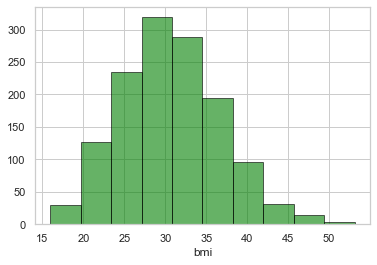

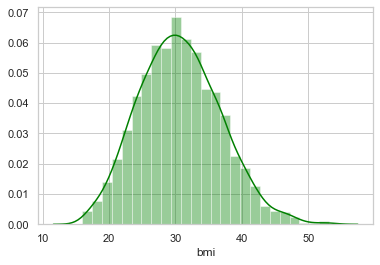

In [43]:
#ploting histogram and dist plot to see distribution of 'bmi' column
plt.hist(insure['bmi'], color= 'green', edgecolor = 'black', alpha = 0.6)
plt.xlabel('bmi')
plt.show()

sns.distplot(insure['bmi'], color= 'green')

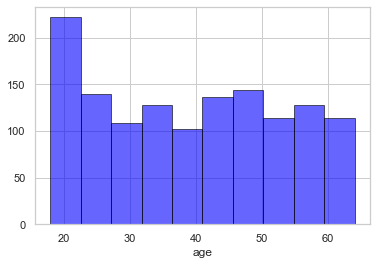

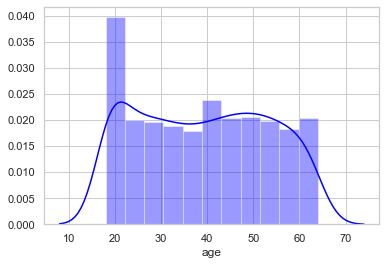

In [44]:
#ploting histogram and dist plot to see distribution of 'age' column
plt.hist(insure['age'], color= 'blue', edgecolor = 'black', alpha = 0.6)
plt.xlabel('age')
plt.show()

sns.distplot(insure['age'], color= 'blue')

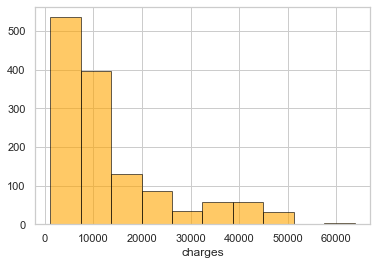

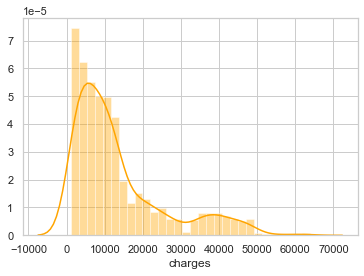

In [102]:
#ploting histogram and dist plot to see distribution of 'charages' column
plt.hist(insure['charges'], color= 'orange', edgecolor = 'black', alpha = 0.6)
plt.xlabel('charges')
plt.show()

sns.distplot(insure['charges'], color= 'orange')

#### 3(f). Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns.

In [46]:
# measuring the of ‘bmi’, ‘age’ and ‘charges’ columns and storing to new dataframe
Skew = pd.DataFrame({'Skewness Value' : [stats.skew(insure.bmi), stats.skew(insure.age),stats.skew(insure.charges)]},
                    index=['bmi','age','charges'])
Skew

,Skewness Value
bmi,0.283729
age,0.055610
charges,1.514180


#### 3(g). Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns.

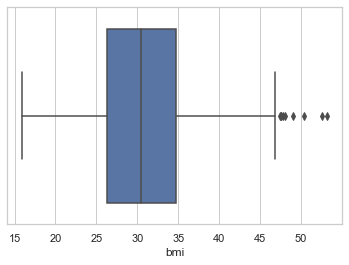

In [47]:
# plotting Box Plot for Column 'bmi'
sns.boxplot(insure['bmi'])

In [48]:
# calculating Q1, Q3 and IQR values
Q1 = np.percentile(insure['bmi'], 25)
Q3 = np.percentile(insure['bmi'], 75)
IQR = Q3 - Q1

#identifying outliers and printing count
bmi_out = [x for x in insure['bmi'] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
print('Identified outliers for bmi:', len(bmi_out))

Identified outliers for bmi: 9


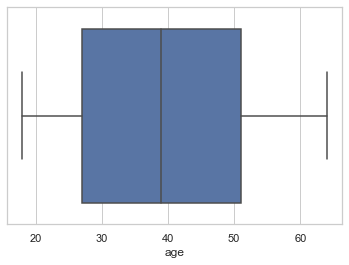

In [49]:
# plotting Box Plot for Column 'age'
sns.boxplot(insure['age'])

In [104]:
#Identifying the presence of outliers in "bmi" column.
Q1 = np.percentile(insure['age'], 25)
Q3 = np.percentile(insure['age'], 75)
IQR = Q3 - Q1

#identifying outliers and printing count
age_out = [x for x in insure['age'] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
print('Identified outliers for age:', len(age_out))

Identified outliers for age: 0


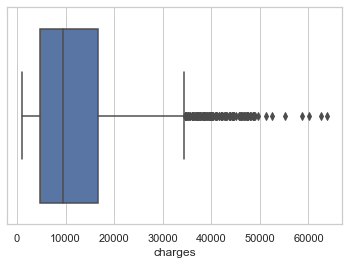

In [51]:
# plotting Box Plot for Column 'charges'
sns.boxplot(insure['charges'])

In [52]:
# calculating Q1, Q3 and IQR values
Q1 = np.percentile(insure['charges'], 25)
Q3 = np.percentile(insure['charges'], 75)
IQR = Q3 - Q1

#identifying outliers and printing count
charges_out = [x for x in insure['charges'] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
print('Identified outliers for charges:', len(charges_out))

Identified outliers for charges: 139


#### 3(h). Distribution of categorical columns (include children).

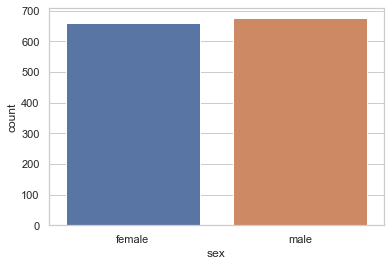

In [53]:
# plotting Count Plot for Column 'sex'
sns.countplot(insure['sex'])

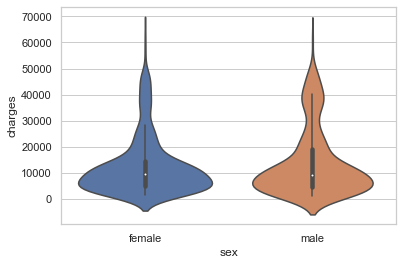

In [57]:
# plotting violin Plot for Column 'sex'
sns.violinplot(y='charges', x='sex', data=insure, split=True)

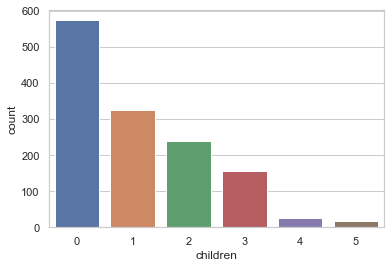

In [54]:
# plotting Count Plot for Column 'children'
sns.countplot(insure['children'])

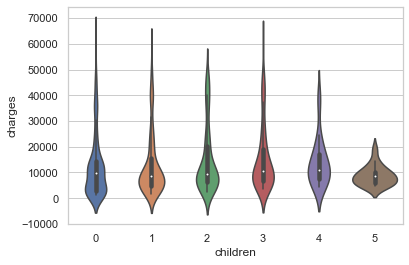

In [58]:
# plotting violin Plot for Column 'children'
sns.violinplot(y='charges', x='children', data=insure, split=True)

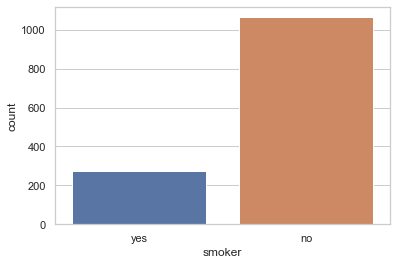

In [55]:
# plotting Count Plot for Column 'smoker'
sns.countplot(insure['smoker'])

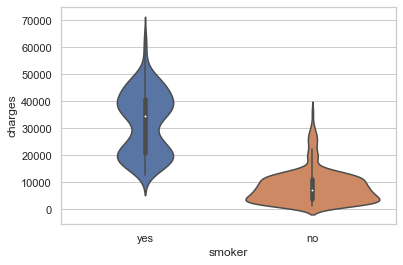

In [59]:
# plotting violin Plot for Column 'smoker'
sns.violinplot(y='charges', x='smoker', data=insure, split=True)

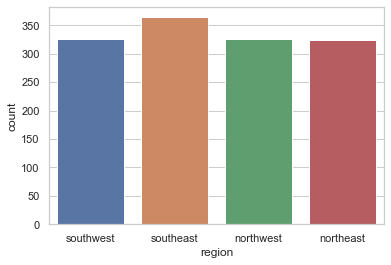

In [56]:
# plotting Count Plot for Column 'region'
sns.countplot(insure['region'])

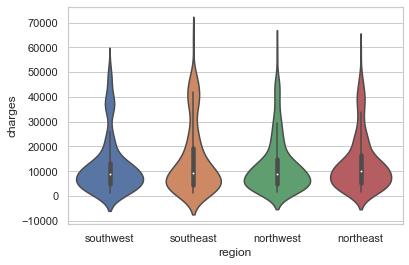

In [60]:
# plotting violin Plot for Column 'region'
sns.violinplot(y='charges', x='region', data=insure, split=True)

#### 3(i). Pair plot that includes all the columns of the data frame.

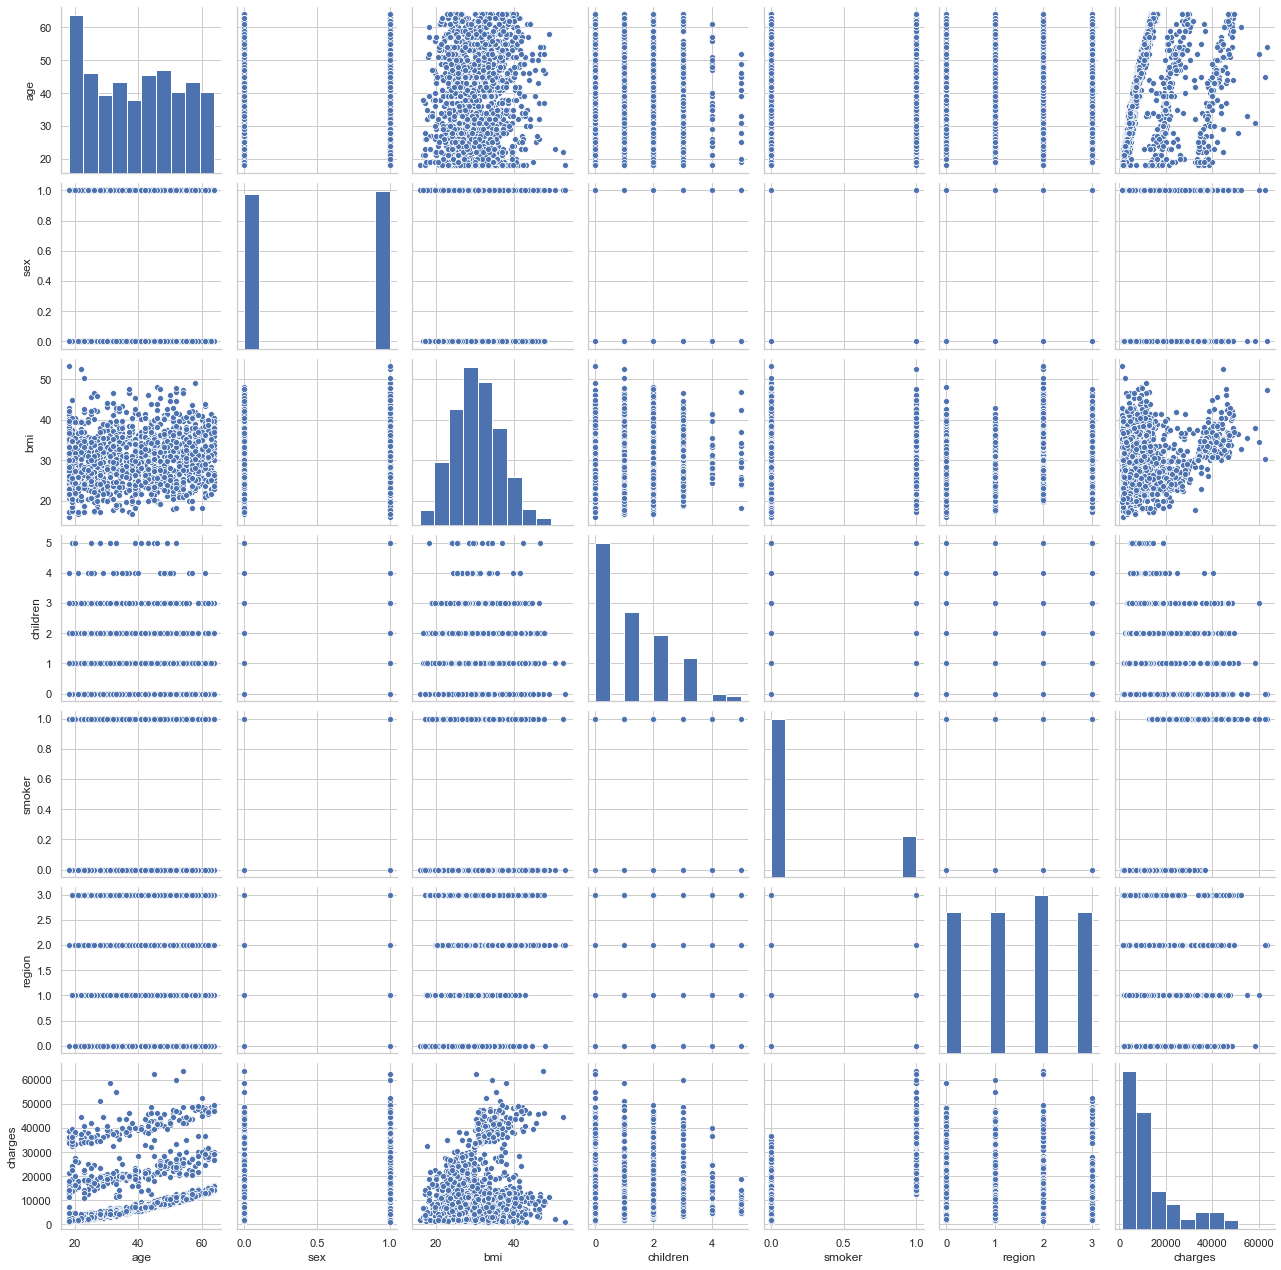

In [105]:
# creating copy of original data set
insure_copy = insure.copy()

# using label encoding to convert string values because pair plot ignores string values
insure_copy.loc[:,['sex', 'smoker', 'region']] = insure.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)

# plotting pair plot for dataframe
sns.pairplot(insure_copy)
plt.show()

### 4. Answer the following questions with statistical evidence.

#### 4(a). Do charges of people who smoke differ significantly from the people who don't?

In [63]:
# displaying count of smokers and non-smokers
insure.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

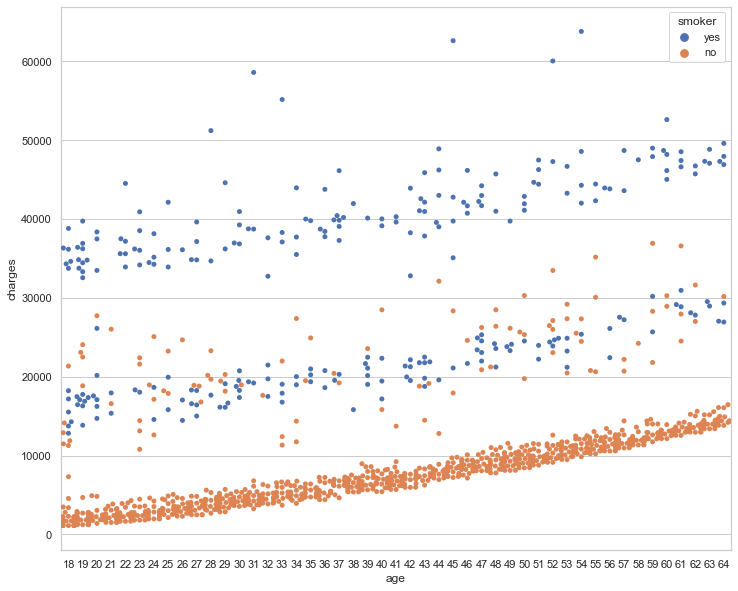

In [64]:
# plotting swarm plot to make comparison over distribution of 'smoker' with respect to 'charges' and 'age'
plt.figure(figsize=(12,10))
sns.swarmplot(y='charges',x='age',hue='smoker',data=insure)
plt.show()

In [65]:
# applying T-test to analyse the effect of smoking on the charges
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"

x = np.array(insure[insure.smoker == 'yes'].charges) 
y = np.array(insure[insure.smoker == 'no'].charges)

# performing an independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)

print(p_value)

8.271435842177219e-283


Conclusion: Rejecting the Null hypothesis as the p-value is lesser than 0.05. It tells us that the paid charges by the smokers and non-smokers is significantly different.Smokers pay higher charges in comparison to the non-smokers

#### 4(b). Does bmi of males differ significantly from that of females?

In [66]:
# displaying count of male and females
insure.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

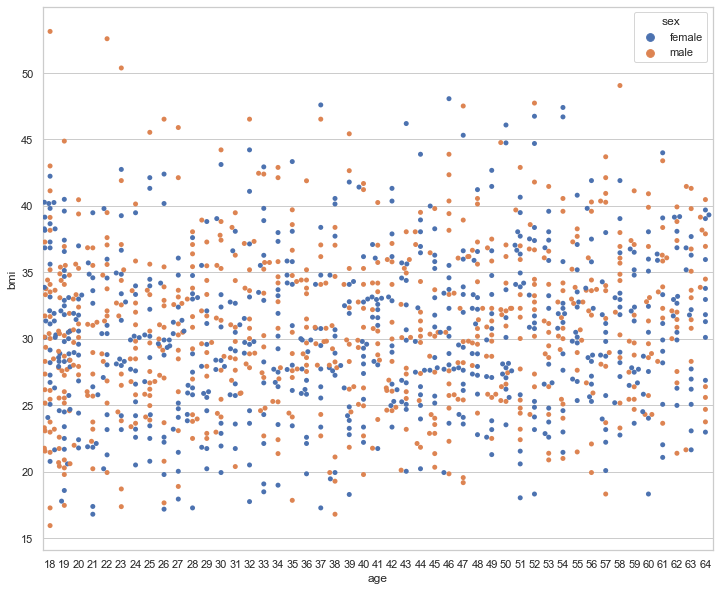

In [67]:
# plotting swarm plot to make comparison over distribution of 'sex' with respect to 'bmi' and 'age'
plt.figure(figsize=(12,10))
sns.swarmplot(y='bmi',x='age',hue='sex',data=insure)
plt.show()

In [68]:
#applying T-test to analyse the effect of gender on the bmi
Ho = "bmi of males does not differ significantly from females"   
Ha = "bmi of males differ significantly from females"   

x = np.array(insure[insure.sex == 'male'].bmi)  
y = np.array(insure[insure.sex == 'female'].bmi) 

# performing an independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)  

print(p_value)

0.08997637178984934


Conclusion: Accepting Null hypothesis as the p-value is greater than 0.05. Hence, BMI does not change significantly on basis of Gender.

#### 4(c). Is the proportion of smokers significantly different in different genders?

In [69]:
Ho = "Gender has no effect on smoking habits" 
Ha = "Gender has an effect on smoking habits"   

# applying Chi_square test
crosstab = pd.crosstab(insure['sex'],insure['smoker']) 
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

print(p_value)

0.006548143503580696


Conclusion: Rejecting Null hypothesis as the p-value is less than 0.05. So, Smoking Habits differs from gender to gender.

#### 4(d). Is the distribution of bmi across women with no children, one child and two children, the same?

In [70]:
Ho = "No. of children has no effect on bmi"   
Ha = "No. of children has an effect on bmi"   

# copy females data to another dataframe
fem = insure[insure['sex'] == 'female'].copy()

zero = fem[fem.children == 0]['bmi']
one = fem[fem.children == 1]['bmi']
two = fem[fem.children == 2]['bmi']

# applying Anova Test
f_stat, p_value = stats.f_oneway(zero,one,two)
print(p_value)

0.7158579926754841


Conclusion: Accepting Null hypothesis as the p-value is greater than 0.05. So, the number of children does not bring any difference in women's bmi.

## And, Project is over!!!

Completed by: Ganpat Patel
Email: ganpat.patel.012@gmail.com